1. Из небольшого объема исходных изображений (картинок) с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.




1. Из текстуальных данных с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from numpy import asarray
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, v_measure_score

In [2]:
#начитаем изображения
path = r"C:\Users\User\image_dataset"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
X = []

# this list holds all the image classes
y = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            img = Image.open(file.name)
            if "circle" in file.name:
                image_class = 0
                y.append(image_class)
            elif "square" in file.name:
                image_class = 1
                y.append(image_class)
            elif "star" in file.name:
                image_class = 2
                y.append(image_class)
            elif "triangle" in file.name:
                image_class = 2
                y.append(image_class)                
            numpydata = asarray(img)
          # adds only the image files to the flowers list
            X.append(numpydata)

array_X = np.array(X)
y = np.array(y)

nsamples, nx, ny = array_X.shape
X_reshaped = array_X.reshape((nsamples,nx*ny))

In [3]:
len(y) #общее количество изображений в датасете

210

In [4]:
#кластеризация с помощью алгоритма k-средних
k_means = KMeans(n_clusters=4, n_init=100, random_state=0).fit(X_reshaped)
y_kmeans = k_means.predict(X_reshaped)

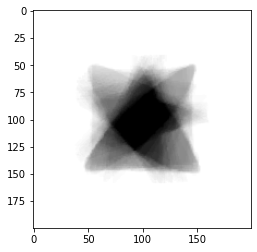

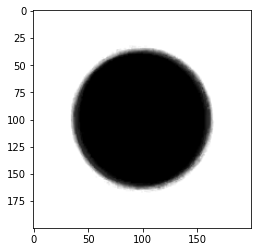

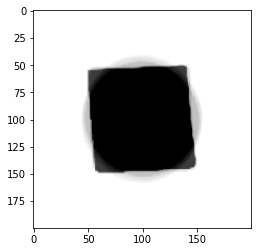

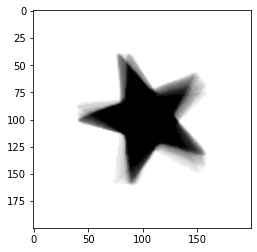

In [5]:
#визуализируем сначала центры кластеров для алгоритма k-средних
centers = k_means.cluster_centers_

plt.gray()

#visualize centers:
for ci in centers: 
    plt.imshow(ci.reshape(nx, ny))
    plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering 

#иерархическая кластеризация
clustering = AgglomerativeClustering(n_clusters=4).fit(X_reshaped)
y_clustering = clustering.fit_predict(X_reshaped)

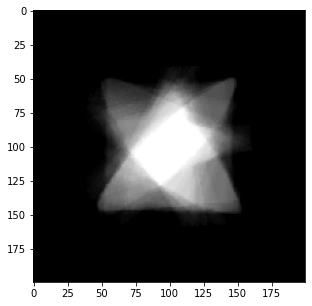

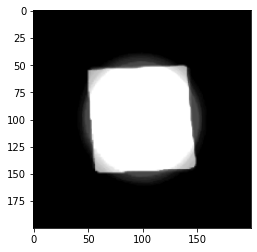

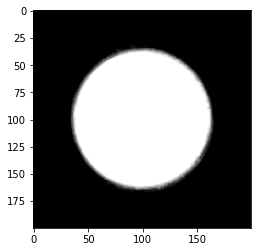

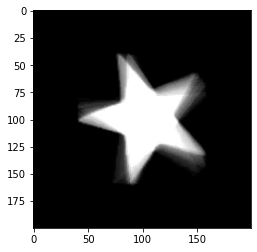

In [7]:
plt.figure(figsize=(10, 5))

plt.gray()
    
for i in range(4): 
    plt.imshow(np.mean(X_reshaped[y_clustering==i],axis=0).reshape(nx, ny), cmap=plt.cm.binary)
    plt.show()

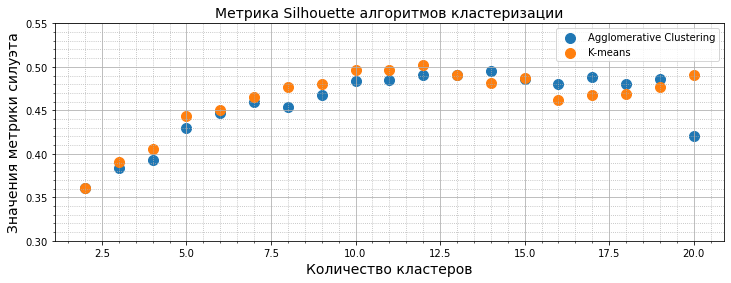

In [8]:
kmean_scores = []
clustering_scores = []


for K in range(2, 21):
    km = KMeans(n_clusters=K, random_state=0).fit(X_reshaped)
    ym = km.predict(X_reshaped)
    kmean_scores.append(silhouette_score(X_reshaped, ym))
    
    aggl = AgglomerativeClustering(n_clusters = K).fit(X_reshaped)
    y_aggl = aggl.fit_predict(X_reshaped)
    clustering_scores.append(silhouette_score(X_reshaped, y_aggl))

#визулизиурем зависимость силуэта каждого из алгоритмов от количества кластеров
fig = plt.figure(figsize=(12, 4))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Количество кластеров', fontsize=14)
plt.ylabel('Значения метрики силуэта', fontsize=14)
plt.title('Метрика Silhouette алгоритмов кластеризации', fontsize=14)
plt.scatter(x=[i for i in range(2,21)],y=clustering_scores,s=100, label='Agglomerative Clustering')
plt.scatter(x=[i for i in range(2,21)],y=kmean_scores,s=100, label='K-means')
plt.ylim([0.3,0.55])
plt.xticks(x=[i for i in range(2,21)]);

    
plt.legend()
plt.show()

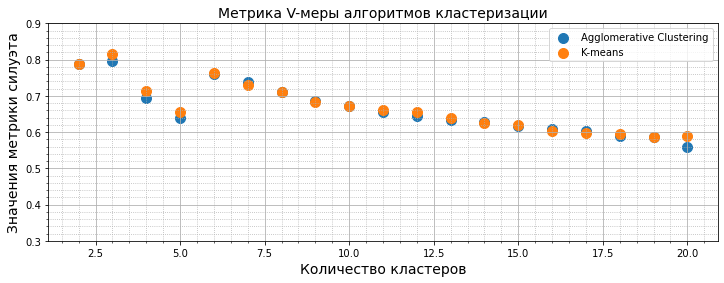

In [9]:
kmean_v_scores = []
clustering_v_scores = []


for K in range(2, 21):
    km = KMeans(n_clusters=K, random_state=0).fit(X_reshaped)
    ym_v = km.predict(X_reshaped)
    kmean_v_scores.append(v_measure_score(y, ym_v))
    
    aggl = AgglomerativeClustering(n_clusters = K).fit(X_reshaped)
    y_aggl_v = aggl.fit_predict(X_reshaped)
    clustering_v_scores.append(v_measure_score(y, y_aggl_v))

#визулизиурем зависимость силуэта каждого из алгоритмов от количества кластеров
fig = plt.figure(figsize=(12, 4))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Количество кластеров', fontsize=14)
plt.ylabel('Значения метрики силуэта', fontsize=14)
plt.title('Метрика V-меры алгоритмов кластеризации', fontsize=14)
plt.scatter(x=[i for i in range(2,21)],y=clustering_v_scores,s=100, label='Agglomerative Clustering')
plt.scatter(x=[i for i in range(2,21)],y=kmean_v_scores,s=100, label='K-means')
plt.ylim([0.3,0.9])
plt.xticks(x=[i for i in range(2,21)]);

    
plt.legend()
plt.show()

Выводы:
Для датасетав 210 изображений были применены следующие алгоритмы кластеризации: иерархическая кластеризации и кластеризации К-средних. Надены центроиды в обоих случаях, они достаточно отображают центры тех кластеров, которым сообветствуют. При это метрики в обоих случаях получились практически идентичными. 